In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("lidar.csv")
df

,X,Y,Z
0,3774.845,4659.86,-377980.59375
1,3670.235,4562.38,-377980.59375
2,3625.005,4559.89,-377980.59375
3,3598.295,4553.51,-377980.59375
4,3712.335,5292.30,-377980.59375
...,...,...,...
5659,-2271.544,56.79,-383024.56250
5660,-2141.414,59.62,-383024.56250
5661,-2143.944,53.18,-383024.56250
5662,-2107.574,49.77,-383024.56250


In [3]:
df.describe()

,X,Y,Z
count,5664.000000,5664.000000,5664.000000
mean,-2089.941426,1934.284513,-381055.287926
std,1976.129922,2107.193842,1339.096624
min,-3999.808000,-70.310000,-383024.562500
25%,-3352.765000,367.132500,-381802.031250
50%,-2615.969500,874.545000,-381215.531250
75%,-2132.809000,4111.967500,-380595.281250
max,3999.651000,7973.610000,-377980.593750


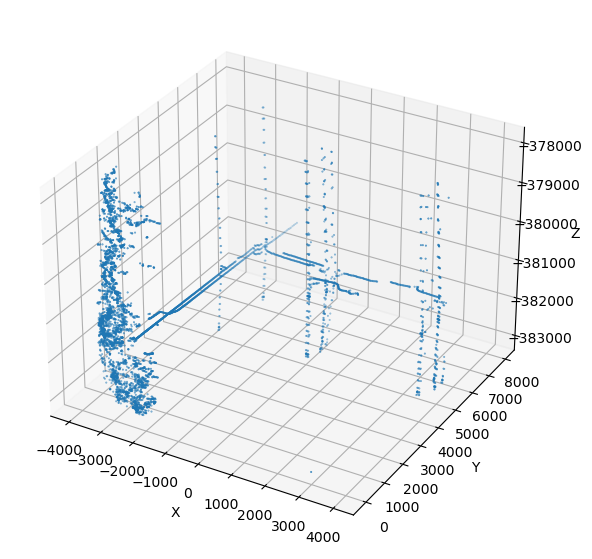

In [4]:
# Visualizar los datos en un gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df["X"], df["Y"], df["Z"], s=0.2)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [5]:
# Seleccionar las columnas que se usarán para el clustering
X = df[["X", "Y", "Z"]]

# Inicializar el algoritmo K-Means con el número de clusters deseado
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)

# Ejecutar el algoritmo de clustering en los datos
kmeans.fit(X)

# Obtener las etiquetas de cluster asignadas a cada punto
labels = kmeans.labels_

# Imprimir las etiquetas de cluster asignadas a cada punto
print(labels)

[2 2 2 ... 1 1 1]


In [6]:
df["label"] = pd.Series(labels)

In [7]:
df.label.unique()

array([2, 0, 1])

In [8]:
df.label.value_counts()

1    3037
2    1437
0    1190
Name: label, dtype: int64

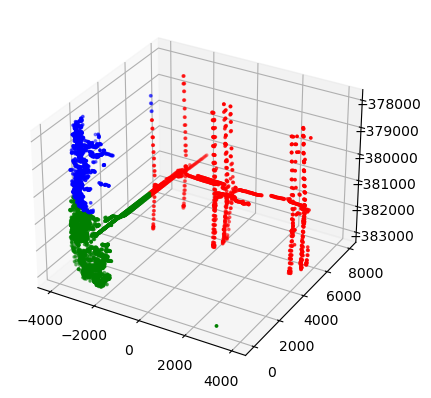

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

for label, color in zip(np.unique(df.label), colors):
    if label == -1:
        # Noisy points
        col = 'k'
        msize = 1
    else:
        col = color
        msize = 3
    
    ax.scatter(df[df.label==label]["X"],
               df[df.label==label]["Y"],
               df[df.label==label]["Z"],
               c=col,
               s=msize)

plt.show()

In [48]:
df_train = df[:int(len(df)*0.7)]
df_test = df[int(len(df)*0.7):]
df_train.shape, df_test.shape

((3964, 4), (1700, 4))

In [39]:
y_test

2910    1
1916    1
2958    1
3559    1
1722    2
       ..
202     0
4038    1
3898    1
1301    2
1427    2
Name: label, Length: 907, dtype: int32

In [62]:
X_test.shape[0],X_train.shape[0], X_test.shape[0]/X_train.shape[0]

(1700, 2264, 0.7508833922261484)

In [59]:
# Cargar y dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('label', axis=1),\
                                    df_train['label'], train_size=2264,  shuffle=True)

In [60]:
# Crear el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = rf.predict(X_test)

Precisión: 0.9982352941176471


In [63]:
f1 = f1_score(df_test.label, y_pred, average="macro")

print("f1_score:", f1)

f1_score: 0.2648924688725684


In [64]:
pd.DataFrame( y_pred).value_counts()

1    715
0    517
2    468
dtype: int64

In [14]:
# Preprocesamiento de los datos
# X_train = X_train.reshape(-1, 1, 3, 1)  # Reorganizar los datos para que sean compatibles con una CNN
# X_test = X_test.reshape(-1, 1, 3, 1)
# y_train = tf.keras.utils.to_categorical(y_train)  # Codificación one-hot de las etiquetas
# y_test = tf.keras.utils.to_categorical(y_test)

In [15]:
# Construir el modelo de la CNN
# model = Sequential([
#     Conv2D(32, kernel_size=(1, 3), activation="relu", input_shape=(1, 3, 1)),
#     MaxPooling2D(pool_size=(1, 1)),
#     Flatten(),
#     Dense(64, activation="relu"),
#     Dense(3, activation="softmax")
# ])


In [16]:
# model.summary()

In [17]:
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [18]:
# model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [19]:
# y_pred = model.predict(X_test)
# np.round(y_pred)

In [20]:
# pd.DataFrame(np.round(y_pred))[0].sum(),pd.DataFrame(np.round(y_pred))[1].sum(),pd.DataFrame(np.round(y_pred))[2].sum()

In [21]:
# pred = pd.DataFrame( y_pred.argmax(axis=1))
# pred